Agentic RAG : be dynamic in which vector databases to use based on query context.

In [5]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")


In [6]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter


In [8]:
urls=[
    "https://langchain-ai.github.io/langgraph/tutorials/introduction/",
    "https://langchain-ai.github.io/langgraph/tutorials/workflows/",
    "https://langchain-ai.github.io/langgraph/how-tos/map-reduce/",
]

docs=[WebBaseLoader(url).load() for url in urls]
docs


[[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/introduction/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')],
 [Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')],
 [Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/how-tos/map-reduce/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')]]

In [11]:
doc_list = [doc for sublist in docs for doc in sublist]

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)

docs_splits = text_splitter.split_documents(doc_list)

print(docs_splits[:2])  # Print first 2 splits for inspection


vecorstore = FAISS.from_documents(docs_splits, OpenAIEmbeddings())

retriever = vecorstore.as_retriever()

[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/introduction/', 'title': 'Redirecting...', 'language': 'en'}, page_content='Redirecting...\n\n\n\n\n\n\nRedirecting...'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Redirecting...', 'language': 'en'}, page_content='Redirecting...\n\n\n\n\n\n\nRedirecting...')]


In [13]:
retriever.invoke("What is Langgraph?")

[Document(id='b2005c2d-4494-41ff-af4d-141f3ad413c3', metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/introduction/', 'title': 'Redirecting...', 'language': 'en'}, page_content='Redirecting...\n\n\n\n\n\n\nRedirecting...'),
 Document(id='f635532f-9835-4ba5-aa85-7e68a6cc1a08', metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Redirecting...', 'language': 'en'}, page_content='Redirecting...\n\n\n\n\n\n\nRedirecting...'),
 Document(id='45c22f4c-19ad-464c-ab85-57f05cc6a389', metadata={'source': 'https://langchain-ai.github.io/langgraph/how-tos/map-reduce/', 'title': 'Redirecting...', 'language': 'en'}, page_content='Redirecting...\n\n\n\n\n\n\nRedirecting...')]

In [19]:
## retrivers tool
from langchain_core.tools import create_retriever_tool

retriever_tool = create_retriever_tool(
    retriever,
    "retriever_vector_db_blog",
    "Search for information about Langgraph. For any questions about Langgraph, you must use this tool!",
)







In [ ]:
##another vector db for langchain docs

urls=[
    "https://python.langchain.com/docs/tutorials/",
    "https://python.langchain.com/docs/tutorials/chatbot/",
    "https://python.langchain.com/docs/tutorials//qa_chat_history/",
]

docs=[WebBaseLoader(url).load() for url in urls]
docs

In [20]:
doc_list = [doc for sublist in docs for doc in sublist]

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)

docs_splits = text_splitter.split_documents(doc_list)

print(docs_splits[:2])  # Print first 2 splits for inspection


vecorstore_langchain = FAISS.from_documents(docs_splits, OpenAIEmbeddings())

retriever_langchain = vecorstore_langchain.as_retriever()

[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/introduction/', 'title': 'Redirecting...', 'language': 'en'}, page_content='Redirecting...\n\n\n\n\n\n\nRedirecting...'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Redirecting...', 'language': 'en'}, page_content='Redirecting...\n\n\n\n\n\n\nRedirecting...')]


In [21]:
## retrivers tool
from langchain_core.tools import create_retriever_tool

retriever_tool_langchain = create_retriever_tool(
    retriever_langchain,
    "retriever_vector_langchain_blog",
    "Search for information about Langchain. For any questions about Langchain, you must use this tool!",
)

In [22]:
tools = [retriever_tool, retriever_tool_langchain]

## Langgraph Workflow

In [23]:
from typing import Annotated, Sequence
from typing_extensions import TypedDict
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages

class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]

    

In [25]:
from langchain_groq import ChatGroq
llm = ChatGroq(model="qwen/qwen3-32b")

llm.invoke("What is Langgraph?")

AIMessage(content='<think>\nOkay, the user is asking what LangGraph is. Let me start by recalling what I know about LangGraph. It\'s a framework related to large language models, right? I remember that LangChain and LangGraph are connected. LangGraph is part of the LangChain ecosystem.\n\nSo, the first thing I need to explain is that LangGraph is a framework for building stateful, graph-based workflows using large language models. It\'s designed to help developers create complex applications by managing the flow of data and state between different components. \n\nI should mention that it\'s built on top of LangChain, which means it integrates with other LangChain components like prompts, models, and memory. The key features here are state management and the ability to create workflows as graphs. State management is important because it allows the application to remember previous interactions and maintain context over time.\n\nThe user might not be familiar with the term "graph-based wo

In [26]:
def agent(state):
    """Invokes the agent model to generate a response based on the current state. Given
    the response, it will decide to retrive using the retriever tools if needed.

    args:
        state (AgentState): The current state of the agent, including messages.
    
    returns:
        str: The response generated by the agent.
    """

    print("CALL AGENT MODEL WITH STATE:", state)

    messages= state["messages"]
    model = ChatGroq(model="qwen/qwen3-32b")
    model = model.bind_tools(tools)
    response = model.invoke(messages)

    return {"messages": [response]}

In [32]:
import langchainhub as hub
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers  import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI
from typing import Annotated, Sequence, Literal

from pydantic import BaseModel, Field



In [35]:
### Edges
def grade_documents(state) -> Literal["generate", "rewrite"]:
    """
    Determines whether the retrieved documents are relevant to the question.

    Args:
        state (messages): The current state

    Returns:
        str: A decision for whether the documents are relevant or not
    """

    print("---CHECK RELEVANCE---")

    # Data model
    class grade(BaseModel):
        """Binary score for relevance check."""

        binary_score: str = Field(description="Relevance score 'yes' or 'no'")

    # LLM
    model = ChatGroq(model="qwen/qwen3-32b")

    # LLM with tool and validation
    llm_with_tool = model.with_structured_output(grade)

    # Prompt
    prompt = PromptTemplate(
        template="""You are a grader assessing relevance of a retrieved document to a user question. \n 
        Here is the retrieved document: \n\n {context} \n\n
        Here is the user question: {question} \n
        If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.""",
        input_variables=["context", "question"],
    )

    # Chain
    chain = prompt | llm_with_tool

    messages = state["messages"]
    last_message = messages[-1]

    question = messages[0].content
    docs = last_message.content

    scored_result = chain.invoke({"question": question, "context": docs})

    score = scored_result.binary_score

    if score == "yes":
        print("---DECISION: DOCS RELEVANT---")
        return "generate"

    else:
        print("---DECISION: DOCS NOT RELEVANT---")
        print(score)
        return "rewrite"

In [37]:
def generate(state):
    """
    Generate answer

    Args:
        state (messages): The current state

    Returns:
         dict: The updated message
    """
    print("---GENERATE---")
    messages = state["messages"]
    question = messages[0].content
    last_message = messages[-1]

    docs = last_message.content

    # Prompt
    prompt = hub.pull("rlm/rag-prompt")

    # LLM
    llm = ChatGroq(model="qwen/qwen3-32b")

    # Post-processing
    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)

    # Chain
    rag_chain = prompt | llm | StrOutputParser()

    # Run
    response = rag_chain.invoke({"context": docs, "question": question})
    return {"messages": [response]}

In [38]:
def rewrite(state):
    """
    Transform the query to produce a better question.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with re-phrased question
    """

    print("---TRANSFORM QUERY---")
    messages = state["messages"]
    question = messages[0].content

    msg = [
        HumanMessage(
            content=f""" \n 
    Look at the input and try to reason about the underlying semantic intent / meaning. \n 
    Here is the initial question:
    \n ------- \n
    {question} 
    \n ------- \n
    Formulate an improved question: """,
        )
    ]

    # Grader
    model = ChatGroq(model="qwen/qwen3-32b")
    response = model.invoke(msg)
    return {"messages": [response]}

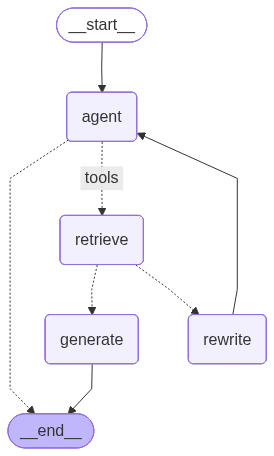

In [39]:
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# Define a new graph
workflow = StateGraph(AgentState)

# Define the nodes we will cycle between
workflow.add_node("agent", agent)  # agent
retrieve = ToolNode([retriever_tool,retriever_tool_langchain])
workflow.add_node("retrieve", retrieve)  # retrieval
workflow.add_node("rewrite", rewrite)  # Re-writing the question
workflow.add_node(
    "generate", generate
)  # Generating a response after we know the documents are relevant
# Call agent node to decide to retrieve or not
workflow.add_edge(START, "agent")

# Decide whether to retrieve
workflow.add_conditional_edges(
    "agent",
    # Assess agent decision
    tools_condition,
    {
        # Translate the condition outputs to nodes in our graph
        "tools": "retrieve",
        END: END,
    },
)

# Edges taken after the `action` node is called.
workflow.add_conditional_edges(
    "retrieve",
    # Assess agent decision
    grade_documents,
)
workflow.add_edge("generate", END)
workflow.add_edge("rewrite", "agent")

# Compile
graph = workflow.compile()
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))


In [40]:
graph.invoke({"messages":"What is Langgraph?"})

CALL AGENT MODEL WITH STATE: {'messages': [HumanMessage(content='What is Langgraph?', additional_kwargs={}, response_metadata={}, id='e6a3b67e-7e02-47da-808d-8fcbcea27bfa')]}
---CHECK RELEVANCE---
---DECISION: DOCS NOT RELEVANT---
no
---TRANSFORM QUERY---
CALL AGENT MODEL WITH STATE: {'messages': [HumanMessage(content='What is Langgraph?', additional_kwargs={}, response_metadata={}, id='e6a3b67e-7e02-47da-808d-8fcbcea27bfa'), AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking, "What is Langgraph?" I need to figure out which tool to use here. Let me check the available functions. There\'s one called retriever_vector_db_blog for Langgraph and another for Langchain. Since the question is about Langgraph, I should use the retriever_vector_db_blog function. The parameters require a query string. The user\'s query is straightforward, so I\'ll use "What is Langgraph?" as the query argument. Make sure to format the tool call correctly in JSON inside the XML

{'messages': [HumanMessage(content='What is Langgraph?', additional_kwargs={}, response_metadata={}, id='e6a3b67e-7e02-47da-808d-8fcbcea27bfa'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking, "What is Langgraph?" I need to figure out which tool to use here. Let me check the available functions. There\'s one called retriever_vector_db_blog for Langgraph and another for Langchain. Since the question is about Langgraph, I should use the retriever_vector_db_blog function. The parameters require a query string. The user\'s query is straightforward, so I\'ll use "What is Langgraph?" as the query argument. Make sure to format the tool call correctly in JSON inside the XML tags.\n', 'tool_calls': [{'id': 'a1mstjzkm', 'function': {'arguments': '{"query":"What is Langgraph?"}', 'name': 'retriever_vector_db_blog'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 144, 'prompt_tokens': 266, 'total_tokens': 410, 'completion_t

In [41]:
graph.invoke({"messages":"What is python?"})

CALL AGENT MODEL WITH STATE: {'messages': [HumanMessage(content='What is python?', additional_kwargs={}, response_metadata={}, id='c5e208b8-bcfa-47b1-a401-23d0ca27f794')]}


{'messages': [HumanMessage(content='What is python?', additional_kwargs={}, response_metadata={}, id='c5e208b8-bcfa-47b1-a401-23d0ca27f794'),
  AIMessage(content='Python is a high-level, interpreted programming language known for its simplicity and readability. It was created by Guido van Rossum and first released in 1991. Python emphasizes code readability with minimal syntax, making it an excellent choice for beginners and experienced developers alike. \n\nKey features include:\n- **General-purpose**: Used for web development, data analysis, artificial intelligence, scientific computing, automation, and more.\n- **Cross-platform**: Works on various operating systems (Windows, macOS, Linux).\n- **Extensive libraries**: A vast ecosystem of libraries and frameworks (e.g., Django, NumPy, Pandas, TensorFlow).\n- **Dynamic typing**: Variables do not require explicit declaration of data types.\n- **Community support**: A large and active community contributes to its growth and resources.\n\

In [42]:
graph.invoke({"messages":"What is langchain?"})

CALL AGENT MODEL WITH STATE: {'messages': [HumanMessage(content='What is langchain?', additional_kwargs={}, response_metadata={}, id='6959af73-078a-4789-8507-4ce17fa656ef')]}
---CHECK RELEVANCE---
---DECISION: DOCS NOT RELEVANT---
no
---TRANSFORM QUERY---
CALL AGENT MODEL WITH STATE: {'messages': [HumanMessage(content='What is langchain?', additional_kwargs={}, response_metadata={}, id='6959af73-078a-4789-8507-4ce17fa656ef'), AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking "What is langchain?" I need to figure out which tool to use here. Looking at the provided functions, there\'s one for Langgraph and one for Langchain. Since the question is about Langchain, the correct tool would be retriever_vector_langchain_blog. The parameters require a query, so I\'ll use "What is langchain?" as the query argument. I should make sure to format the tool call correctly within the XML tags.\n', 'tool_calls': [{'id': 'xbyvzy67f', 'function': {'arguments': '{"qu

{'messages': [HumanMessage(content='What is langchain?', additional_kwargs={}, response_metadata={}, id='6959af73-078a-4789-8507-4ce17fa656ef'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking "What is langchain?" I need to figure out which tool to use here. Looking at the provided functions, there\'s one for Langgraph and one for Langchain. Since the question is about Langchain, the correct tool would be retriever_vector_langchain_blog. The parameters require a query, so I\'ll use "What is langchain?" as the query argument. I should make sure to format the tool call correctly within the XML tags.\n', 'tool_calls': [{'id': 'xbyvzy67f', 'function': {'arguments': '{"query":"What is langchain?"}', 'name': 'retriever_vector_langchain_blog'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 130, 'prompt_tokens': 266, 'total_tokens': 396, 'completion_time': 0.202621876, 'completion_tokens_details': {'reasoning_tokens': 9